In [18]:
import glacierml
import tensorflow as tf

In [19]:
print(tf.__version__)

2.8.0


# Step 0. Match the indices in RGI with those in GlaThiDa
This corresponds to the file ```workflow_step0_merge_training_data.py```. But note that this is can't really be run in a notebook because with ```useMP=True``` then note that multiprocessing doesn't play well with notebooks...

In [2]:
pth = '/data/fast1/glacierml/data/'
# output=glacierml.match_GlaThiDa_RGI_index(pth=pth, useMP=True);
# This writes the file to:  pth + '/v2/GlaThiDa_with_RGIId_v2.csv'

# Step 1. Build and train models.
This corresponds to the file ```workflow_step1_run_bootstrap_and_ensemble.py```.
Here, to illustrate the general ideas, we just build and train a single model rather than
going through the bootstrap/ensemble process.

First, load the training data,

In [3]:
parameterization, dataset, dataset.name, res = \
    glacierml.select_dataset_coregistration(pth=pth)
dataset

,RGIId,CenLat,CenLon,Area,Zmin,Zmed,Zmax,Slope,Aspect,Lmax,Thickness,region,size difference,RGI Centroid Distance,AVG Radius,Roundness,distance test
0,RGI60-01.00037,63.469173,-146.528168,234.583,722,1841,3081,12.0,30,41911,235.0,01,0.046411,1851.480653,8641.185569,0.206179,0.214262
1,RGI60-01.00570,63.281000,-145.427000,17.567,1162,1858,2438,14.0,172,8639,147.0,01,0.090735,707.576070,2364.688092,0.273722,0.299226
2,RGI60-01.01104,58.380000,-134.349000,9.528,676,1123,1494,10.0,327,6332,66.0,01,0.185641,643.556206,1741.509861,0.275033,0.369539
3,RGI60-01.02236,69.276000,-143.819000,0.153,2360,2440,2554,22.0,219,680,83.0,01,0.979324,622.846071,220.683965,0.324535,2.822344
4,RGI60-01.02236,69.276000,-143.819000,0.153,2360,2440,2554,22.0,219,680,82.0,01,0.974585,622.846071,220.683965,0.324535,2.822344
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,RGI60-19.01012,-65.052700,-63.393600,0.213,10,-999,50,0.0,-9,318,312.0,19,0.999174,77370.878372,260.384342,0.818819,297.141056
496,RGI60-19.01950,-62.047200,-58.376500,7.240,30,-999,630,7.4,150,5187,238.0,19,0.984430,2079.113914,1518.078910,0.292670,1.369569
497,RGI60-19.02058,-62.675200,-60.390600,1.160,10,-999,370,10.0,260,1118,89.0,19,0.754757,1013.640365,607.650778,0.543516,1.668130
498,RGI60-19.02059,-62.670700,-60.354700,5.493,10,-999,370,6.7,273,3056,97.0,19,0.020856,193.860066,1322.299590,0.432690,0.146608


In [4]:
import numpy as np
dataset = dataset[['Slope', 'Area', 'Thickness']]
dataset['Area'] = np.log(dataset['Area'])
# dataset['Lmax'] = dataset['Lmax'] * 1e3
# dataset['Lmax'] = np.log(dataset['Lmax'])

dataset.name = 'df'
dataset

,Slope,Area,Thickness
0,12.0,5.457809,235.0
1,14.0,2.866022,147.0
2,10.0,2.254235,66.0
3,22.0,-1.877317,83.0
4,22.0,-1.877317,82.0
...,...,...,...
495,0.0,-1.546463,312.0
496,7.4,1.979621,238.0
497,10.0,0.148420,89.0
498,6.7,1.703475,97.0


In [5]:
# dataset = dataset.drop('Zmed', axis = 1)

In [6]:
# import numpy as np
# dataset['Area'] = dataset['Area'] * 1e6
# dataset['Area'] = np.log(dataset['Area'])
# dataset['Lmax'] = np.log(dataset['Lmax'])

Then train a single NN model with the data:

In [7]:
# lr_input = 0.01
rs = 0
# ep_input = 2000
layer_1_input = 10
layer_2_input = 5
dropout = True

dnn_model = glacierml.build_and_train_model(
                        dataset, 
#                         learning_rate = float(lr_input), 
#                         random_state = rs, 
#                         epochs = int(ep_input), 
                        parameterization = parameterization, 
                        res = res,
                        layer_1 = layer_1_input,
                        layer_2 = layer_2_input,
                        dropout = dropout,
                        writeToFile = False
)   

2023-01-23 09:32:38.575105: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudnn.so.8'; dlerror: libcudnn.so.8: cannot open shared object file: No such file or directory
2023-01-23 09:32:38.575133: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1850] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
2023-01-23 09:32:38.575461: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [8]:
model_thicknesses = glacierml.evaluate_model('10-5', rs, dataset, dnn_model)
model_thicknesses

,Slope,Area,model,test mae,train mae,architecture,coregistration,total parameters,GlaThiDa Thickness,E&L Thickness,Residual
0,9.1,4.058026,0,31.696861,28.344343,10-5,df,96,175.0,125.685593,49.314407
1,15.9,2.877737,0,31.696861,28.344343,10-5,df,96,82.0,85.819565,-3.819565
2,15.8,1.156567,0,31.696861,28.344343,10-5,df,96,51.0,52.191639,-1.191639
3,30.0,1.886312,0,31.696861,28.344343,10-5,df,96,29.0,52.363224,-23.363224
4,29.7,-2.847312,0,31.696861,28.344343,10-5,df,96,54.0,52.760017,1.239983
...,...,...,...,...,...,...,...,...,...,...,...
495,11.1,2.572460,0,31.696861,28.344343,10-5,df,96,47.0,87.637024,-40.637024
496,19.7,1.944910,0,31.696861,28.344343,10-5,df,96,42.0,60.471924,-18.471924
497,10.0,1.978654,0,31.696861,28.344343,10-5,df,96,122.0,79.173935,42.826065
498,29.7,-0.536143,0,31.696861,28.344343,10-5,df,96,23.0,42.018726,-19.018726


In [9]:
model_thicknesses['Residual'].mean()

9.162863792419433

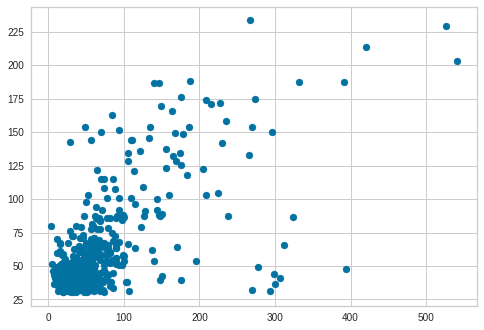

In [10]:
import matplotlib.pyplot as plt
plt.scatter(model_thicknesses['GlaThiDa Thickness'], model_thicknesses['E&L Thickness'])

In [11]:
model_statistics = glacierml.calculate_model_avg_statistics(
            dnn_model,
            '10-5',
            dataset,
            model_thicknesses
        )
model_statistics

,layer architecture,total parameters,trained parameters,total inputs,test mae avg,train mae avg,test mae std dev,train mae std dev
0,10-5,96.0,91.0,1000.0,31.696861,28.344343,0.0,0.0


In [12]:
RGI = glacierml.load_RGI()
# RGI = RGI.drop(['RGIId', 'region'], axis = 1)
RGI

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,region
0,RGI60-01.00001,63.6890,-146.8230,42.0,1936,2385,2725,0.360,346,839,01
1,RGI60-01.00002,63.4040,-146.6680,16.0,1713,2005,2144,0.558,162,1197,01
2,RGI60-01.00003,63.3760,-146.0800,18.0,1609,1868,2182,1.685,175,2106,01
3,RGI60-01.00004,63.3810,-146.1200,19.0,1273,1944,2317,3.681,195,4175,01
4,RGI60-01.00005,63.5510,-147.0570,16.0,1494,1914,2317,2.573,181,2981,01
...,...,...,...,...,...,...,...,...,...,...,...
216496,RGI60-19.02748,-53.9860,-37.7325,29.9,310,-999,510,0.042,315,255,19
216497,RGI60-19.02749,-54.8310,-36.1361,23.6,330,-999,830,0.567,200,1130,19
216498,RGI60-19.02750,-54.1884,-37.3018,16.8,10,-999,1110,4.118,308,4329,19
216499,RGI60-19.02751,-68.8656,-90.4266,0.4,170,-999,270,0.011,122,106,19


In [13]:
# RGI['region'] = RGI['RGIId'].str[6:8]
for region_selection in range(1,20,1):
#     print(region_selection)
    
    
    
    if len(str(region_selection)) == 1:
        N = 1
        region_selection = str(region_selection).zfill(N + len(str(region_selection)))
    else:
        region_selection = region_selection

    
    RGI = RGI.reset_index()
    RGI = RGI.drop('index', axis=1)
#     if region_selection != '19':
    drops = RGI[
        ((RGI['region'] == str(region_selection)) & (RGI['Zmin'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Zmed'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Zmax'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Slope'] < 0)) |
        ((RGI['region'] == str(region_selection)) & (RGI['Aspect'] < 0))
    ].index
#         print(drops)
#         if not drops.empty:
#             print('dropping bad data')
    RGI = RGI.drop(drops)
RGI

,RGIId,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax,region
0,RGI60-01.00001,63.6890,-146.823,42.0,1936,2385,2725,0.360,346,839,01
1,RGI60-01.00002,63.4040,-146.668,16.0,1713,2005,2144,0.558,162,1197,01
2,RGI60-01.00003,63.3760,-146.080,18.0,1609,1868,2182,1.685,175,2106,01
3,RGI60-01.00004,63.3810,-146.120,19.0,1273,1944,2317,3.681,195,4175,01
4,RGI60-01.00005,63.5510,-147.057,16.0,1494,1914,2317,2.573,181,2981,01
...,...,...,...,...,...,...,...,...,...,...,...
213702,RGI60-18.03533,-43.4215,170.354,34.7,1231,1724,2098,0.189,116,944,18
213703,RGI60-18.03534,-43.4550,170.349,36.1,1881,2106,2208,0.040,108,331,18
213704,RGI60-18.03535,-43.4400,170.351,39.2,1677,1974,2253,0.184,104,740,18
213705,RGI60-18.03536,-43.4106,170.364,34.0,1627,1839,1928,0.111,135,406,18


In [14]:
RGI = RGI.drop(['RGIId', 'region'], axis = 1)

In [15]:
RGI

,CenLat,CenLon,Slope,Zmin,Zmed,Zmax,Area,Aspect,Lmax
0,63.6890,-146.823,42.0,1936,2385,2725,0.360,346,839
1,63.4040,-146.668,16.0,1713,2005,2144,0.558,162,1197
2,63.3760,-146.080,18.0,1609,1868,2182,1.685,175,2106
3,63.3810,-146.120,19.0,1273,1944,2317,3.681,195,4175
4,63.5510,-147.057,16.0,1494,1914,2317,2.573,181,2981
...,...,...,...,...,...,...,...,...,...
213702,-43.4215,170.354,34.7,1231,1724,2098,0.189,116,944
213703,-43.4550,170.349,36.1,1881,2106,2208,0.040,108,331
213704,-43.4400,170.351,39.2,1677,1974,2253,0.184,104,740
213705,-43.4106,170.364,34.0,1627,1839,1928,0.111,135,406


In [16]:
predictions = dnn_model.predict(RGI, verbose = 0)
predictions

ValueError: in user code:

    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/engine/training.py", line 1751, in predict_step
        return self(x, training=False)
    File "/home/sa42/.local/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "normalization_2" (type Normalization).
    
    Dimensions must be equal, but are 9 and 2 for '{{node sequential/normalization_2/sub}} = Sub[T=DT_FLOAT](sequential/Cast, sequential/normalization_2/sub/y)' with input shapes: [?,9], [1,2].
    
    Call arguments received:
      • inputs=tf.Tensor(shape=(None, 9), dtype=float32)


In [ ]:
df

In [ ]:
np.exp(df['Area'])/1e6

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Lmax'],df['Mean Thickness'])
plt.xlabel('Area')
plt.ylabel('Mean Thickness')